<a href="https://colab.research.google.com/github/iremgngr/Machine_Learning/blob/main/ID3_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [ ]:
df = pd.read_csv("play_tennis.csv")
df = df.sample(frac=1) # (shuffle) modelin öğrenme sürecinde veri sırasının etkisini azaltmak için kullanılır. frac=1, veri setinin tamamını karıştıracağını belirtir.
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
10,Sunny,Mild,Normal,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
8,Sunny,Cool,Normal,Weak,Yes
1,Sunny,Hot,High,Strong,No
11,Overcast,Mild,High,Strong,Yes
2,Overcast,Hot,High,Weak,Yes
0,Sunny,Hot,High,Weak,No
7,Sunny,Mild,High,Weak,No
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
X = pd.get_dummies(df.drop('Play Tennis', axis=1))  #get dummies ile hedef özellik dışında kullanacağımız özellikleri sayısal değerlere çeviriyoruz, bunun için numpy array de kullanılabilir ama her özellik için manuel ayarlama yapmak gerekir
y = df['Play Tennis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)  #random state ile her çalıştırmada aynı eğitim ve test setini elde ederiz

In [ ]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4)  #overfittting'i engellemek için max derinliği ayarlayabiliriz
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

Feature Importances:
{'Outlook_Overcast': 0.0, 'Outlook_Rain': 0.0, 'Outlook_Sunny': 0.6073508754546143, 'Temperature_Cool': 0.0, 'Temperature_Hot': 0.0, 'Temperature_Mild': 0.0, 'Humidity_High': 0.39264912454538575, 'Humidity_Normal': 0.0, 'Wind_Strong': 0.0, 'Wind_Weak': 0.0}


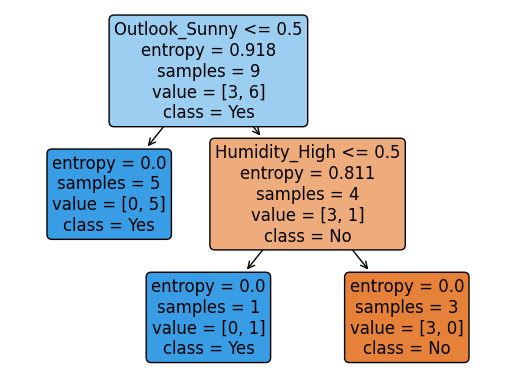

In [ ]:
# Modelin entropilerini ve dallanma bilgilerini görüntüleme
importances = dtree.feature_importances_
print(f"Feature Importances:\n{dict(zip(X.columns, importances))}")

# Karar ağacını görselleştirme
import matplotlib.pyplot as plt
plot_tree(dtree, feature_names=X.columns, class_names=dtree.classes_, filled=True, rounded=True)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="Yes")  # "Yes" labelini pozitif sınıf olarak alıyoruz
recall = recall_score(y_test, y_pred, pos_label="Yes")
f1 = f1_score(y_test, y_pred, pos_label="Yes")

print(f"Sklearn Accuracy: {accuracy}")  #Accuracy: Doğru tahmin edilen örneklerin toplam örneğe oranıdır
print("Sklearn Confusion Matrix:\n", cm) #TP FP FN TN
print(f"Sklearn Precision: {precision}") #Pozitif olarak tahmin edilen örneklerin ne kadarının gerçekten pozitif olduğunu gösterir
print(f"Sklearn Recall: {recall}")  #Recall, true positive örneklerin ne kadarının doğru tahmin edildiğini gösterir
print(f"Sklearn F1-Score: {f1}") #Precision ve Recall'un harmonik ortalaması

Sklearn Accuracy: 0.6
Sklearn Confusion Matrix:
 [[0 2]
 [0 3]]
Sklearn Precision: 0.6
Sklearn Recall: 1.0
Sklearn F1-Score: 0.7499999999999999


In [ ]:
def custom_accuracy_score(y_true, y_pred):
    correct = 0
    for true, pred in zip(y_true, y_pred):  #her iki listenin aynı indexlerini birleştirir, böylelikle (true, pred) şeklinde yeni bir liste oluşturmuş oluruz
        if true == pred:
            correct += 1
    accuracy = correct / len(y_true)
    return accuracy

custom_accuracy = custom_accuracy_score(y_test.tolist(), y_pred.tolist())
print(f"Custom Accuracy: {custom_accuracy}")

Custom Accuracy: 0.6


In [ ]:
def custom_confusion_matrix(y_true, y_pred):
    labels = ['Yes', 'No']
    matrix = {label: {label2: 0 for label2 in labels} for label in labels}

    print("Initial Confusion Matrix (All zeros):")
    for true_label, preds in matrix.items():
        print(f"{true_label}: {preds}")

    for true, pred in zip(y_true, y_pred):
        matrix[true][pred] += 1

    return matrix

custom_cm = custom_confusion_matrix(y_test.tolist(), y_pred.tolist())
print("Custom Confusion Matrix:")
for true_label, preds in custom_cm.items():
    print(f"{true_label}: {preds}")

Initial Confusion Matrix (All zeros):
Yes: {'Yes': 0, 'No': 0}
No: {'Yes': 0, 'No': 0}
Custom Confusion Matrix:
Yes: {'Yes': 3, 'No': 0}
No: {'Yes': 2, 'No': 0}


In [ ]:
def custom_precision(y_true, y_pred, pos_label):
    TP = FP = 0
    for true, pred in zip(y_true, y_pred):
        if true == pos_label and pred == pos_label:
            TP += 1  # True Positive
        elif true != pos_label and pred == pos_label:
            FP += 1  # False Positive
    return TP / (TP + FP) if (TP + FP) > 0 else 0

def custom_recall(y_true, y_pred, pos_label="Yes"):
    TP = FN = 0
    for true, pred in zip(y_true, y_pred):
        if true == pos_label and pred == pos_label:
            TP += 1  # True Positive
        elif true == pos_label and pred != pos_label:
            FN += 1  # False Negative
    return TP / (TP + FN) if (TP + FN) > 0 else 0

def custom_f1(y_true, y_pred, pos_label="Yes"):
    precision = custom_precision(y_true, y_pred, pos_label)
    recall = custom_recall(y_true, y_pred, pos_label)
    return 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

custom_precision_value = custom_precision(y_test.tolist(), y_pred.tolist(), "Yes")
custom_recall_value = custom_recall(y_test.tolist(), y_pred.tolist(), "Yes")
custom_f1_value = custom_f1(y_test.tolist(), y_pred.tolist(), "Yes")

print(f"Custom Precision: {custom_precision_value}")
print(f"Custom Recall: {custom_recall_value}")
print(f"Custom F1-Score: {custom_f1_value}")

Custom Precision: 0.6
Custom Recall: 1.0
Custom F1-Score: 0.7499999999999999
